### Download dataset from kaggle

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp /content/drive/MyDrive/Colab/kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 882MB/s]


In [6]:
! unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [7]:
! rm -rf imdb-dataset-of-50k-movie-reviews.zip

### Imports

In [52]:
import pandas as pd
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [10]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [11]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

### Delete HTML tags

In [12]:
from bs4 import BeautifulSoup

def clean_text(text) :
    soup = BeautifulSoup(text)
    return soup.get_text()

In [13]:
data['review'] = data['review'].apply(clean_text)

In [14]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

### Label encoder

In [15]:
data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(data['sentiment'])

In [17]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### Tokenize

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['review'])

In [20]:
encode = tokenizer.texts_to_sequences(data['review'])

In [21]:
x = pad_sequences(encode , maxlen = len(max(encode , key = len)) , padding = 'post')

In [22]:
x.shape

(50000, 2466)

In [23]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 17)

In [24]:
from keras.layers import Embedding , Conv1D , MaxPooling1D , Flatten , Dense , Dropout

In [47]:
reg = keras.regularizers.l2(0.002)

model = keras.models.Sequential()
model.add(Embedding(input_dim = len(tokenizer.word_index) + 1 , output_dim = 50 , input_length = x.shape[1] , embeddings_regularizer = reg))
model.add(Conv1D(filters = 32 , kernel_size = 4 , activation = 'relu' , padding = 'same'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(rate = 0.3))
model.add(Dense(units = 1 , activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [48]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) ,
    loss = tf.losses.BinaryCrossentropy() ,
    metrics = [tf.metrics.BinaryAccuracy()]
)

In [50]:
model.fit(x_train , y_train , epochs = 10 , batch_size = 64 , validation_split = 0.2 , verbose = 2)

Epoch 1/10
469/469 - 10s - 21ms/step - binary_accuracy: 0.7739 - loss: 0.8419 - val_binary_accuracy: 0.8713 - val_loss: 0.4354
Epoch 2/10
469/469 - 4s - 9ms/step - binary_accuracy: 0.8908 - loss: 0.4163 - val_binary_accuracy: 0.8777 - val_loss: 0.4458
Epoch 3/10
469/469 - 4s - 9ms/step - binary_accuracy: 0.9063 - loss: 0.4006 - val_binary_accuracy: 0.8820 - val_loss: 0.4541
Epoch 4/10
469/469 - 4s - 9ms/step - binary_accuracy: 0.9179 - loss: 0.3801 - val_binary_accuracy: 0.8927 - val_loss: 0.4456
Epoch 5/10
469/469 - 4s - 9ms/step - binary_accuracy: 0.9281 - loss: 0.3701 - val_binary_accuracy: 0.8900 - val_loss: 0.4656
Epoch 6/10
469/469 - 4s - 9ms/step - binary_accuracy: 0.9421 - loss: 0.3486 - val_binary_accuracy: 0.8708 - val_loss: 0.5447
Epoch 7/10
469/469 - 4s - 9ms/step - binary_accuracy: 0.9488 - loss: 0.3436 - val_binary_accuracy: 0.8855 - val_loss: 0.5359
Epoch 8/10
469/469 - 4s - 9ms/step - binary_accuracy: 0.9615 - loss: 0.3160 - val_binary_accuracy: 0.8803 - val_loss: 0.578

In [51]:
model.evaluate(x_test , y_test)

391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.8849 - loss: 0.6181


[0.6266537308692932, 0.8831999897956848]

### Decrease tokens

In [53]:
list_len = [len(i) for i in encode]

In [54]:
np.average(list_len)

np.float64(230.93756)

In [55]:
np.median(list_len)

np.float64(173.0)

In [56]:
np.min(list_len)

np.int64(6)

In [57]:
np.max(list_len)

np.int64(2466)

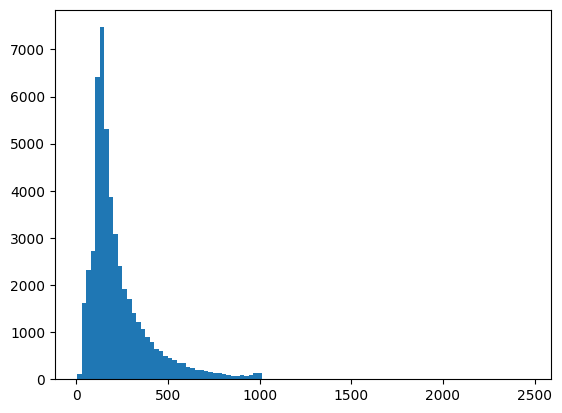

In [58]:
plt.hist(list_len , bins = 100)
plt.show()

In [59]:
x = pad_sequences(encode , maxlen = 200 , padding = 'post')

In [60]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 17)

In [61]:
reg = keras.regularizers.l2(0.002)

model = keras.models.Sequential()
model.add(Embedding(input_dim = len(tokenizer.word_index) + 1 , output_dim = 50 , input_length = x.shape[1] , embeddings_regularizer = reg))
model.add(Conv1D(filters = 32 , kernel_size = 4 , activation = 'relu' , padding = 'same'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(rate = 0.3))
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [62]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) ,
    loss = tf.losses.BinaryCrossentropy() ,
    metrics = [tf.metrics.BinaryAccuracy()]
)

In [64]:
model.fit(x_train , y_train , epochs = 10 , batch_size = 64 , validation_split = 0.2 , verbose = 2)

Epoch 1/10
469/469 - 8s - 18ms/step - binary_accuracy: 0.7735 - loss: 0.8494 - val_binary_accuracy: 0.8699 - val_loss: 0.4532
Epoch 2/10
469/469 - 2s - 3ms/step - binary_accuracy: 0.8876 - loss: 0.4207 - val_binary_accuracy: 0.8789 - val_loss: 0.4344
Epoch 3/10
469/469 - 2s - 3ms/step - binary_accuracy: 0.9028 - loss: 0.3986 - val_binary_accuracy: 0.8856 - val_loss: 0.4369
Epoch 4/10
469/469 - 2s - 3ms/step - binary_accuracy: 0.9154 - loss: 0.3806 - val_binary_accuracy: 0.8839 - val_loss: 0.4520
Epoch 5/10
469/469 - 2s - 3ms/step - binary_accuracy: 0.9282 - loss: 0.3669 - val_binary_accuracy: 0.8764 - val_loss: 0.4880
Epoch 6/10
469/469 - 2s - 3ms/step - binary_accuracy: 0.9382 - loss: 0.3524 - val_binary_accuracy: 0.8809 - val_loss: 0.5014
Epoch 7/10
469/469 - 2s - 3ms/step - binary_accuracy: 0.9503 - loss: 0.3347 - val_binary_accuracy: 0.8772 - val_loss: 0.5522
Epoch 8/10
469/469 - 2s - 3ms/step - binary_accuracy: 0.9589 - loss: 0.3158 - val_binary_accuracy: 0.8860 - val_loss: 0.5641

In [65]:
model.evaluate(x_test , y_test)

391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.8800 - loss: 0.6565


[0.6594839692115784, 0.8795999884605408]